In [163]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime

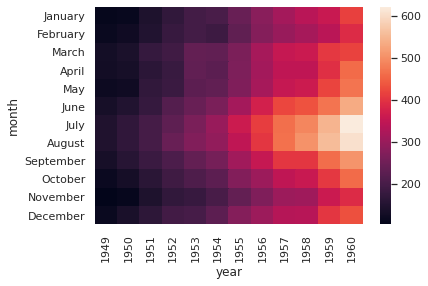

In [164]:
#Display Heatmap of passenger count vs month and year
data = sns.load_dataset('flights')
data = data.pivot('month','year','passengers')
heatmap = sns.heatmap(data)

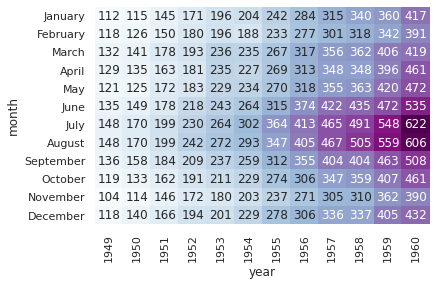

In [165]:
heatmap = sns.heatmap(data,annot=True,fmt='d', cmap="BuPu",linewidths=0,cbar=False)


In [166]:
!pip install kaggle
!mkdir -p ~/.kaggle

from google.colab import drive
drive.mount("/content/drive")
!cp "/content/drive/My Drive/kaggle.json" ~/.kaggle
!kaggle competitions download -c house-prices-advanced-regression-techniques --force


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
  0% 0.00/441k [00:00<?, ?B/s]
100% 441k/441k [00:00<00:00, 62.0MB/s]
  0% 0.00/13.1k [00:00<?, ?B/s]
100% 13.1k/13.1k [00:00<00:00, 12.2MB/s]
  0% 0.00/31.2k [00:00<?, ?B/s]
100% 31.2k/31.2k [00:00<00:00, 29.1MB/s]
  0% 0.00/450k [00:00<?, ?B/s]
100% 450k/450k [00:00<00:00, 60.0MB/s]


In [167]:
df_train = pd.read_csv("train.csv")
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

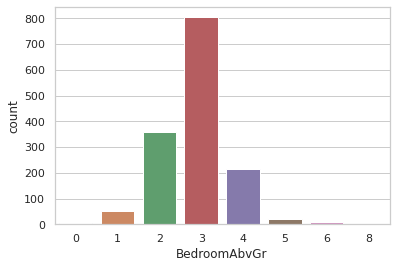

In [168]:
#Number of houses with count of bedrooms above ground
sns.set(style="whitegrid")
ax = sns.countplot(x="BedroomAbvGr", data=df_train)

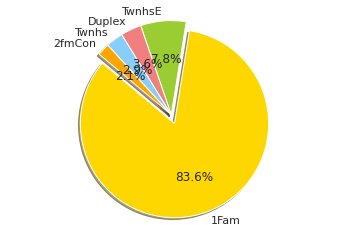

In [169]:
#Show Building type types using a Pie Chart
bldg_type=df_train['BldgType'].value_counts()

#print(bldg_type)
#print(bldg_type.index.values)
#print(bldg_type.values)

labels = bldg_type.index.values
sizes = bldg_type.values
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue','orange']
explode = [0] *len(labels)
explode[0] = 0.1

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show()

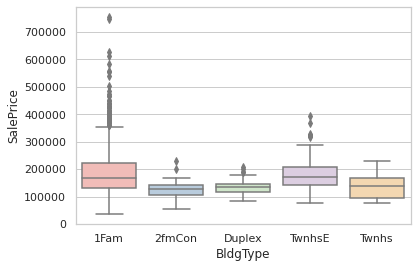

In [187]:
#Box Plot Building Type vs sale price

ax = sns.boxplot(x='BldgType',y='SalePrice',data=df_train,palette="Pastel1")


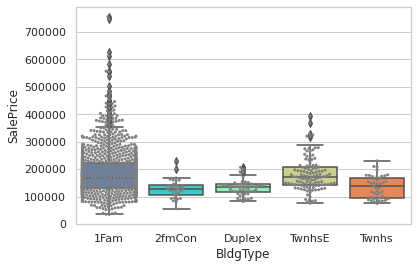

In [193]:
ax=sns.boxplot(x='BldgType',y='SalePrice',data=df_train, palette="rainbow")
ax=sns.swarmplot(x='BldgType',y='SalePrice',data=df_train,color="0.50",edgecolor="lightblue",size=3)

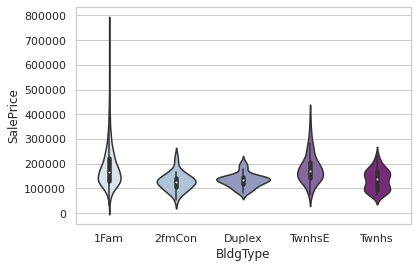

In [197]:
ax=sns.violinplot(x='BldgType',y='SalePrice',data=df_train, palette="BuPu")

In [170]:
#Describe SalePrice Statistics

df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

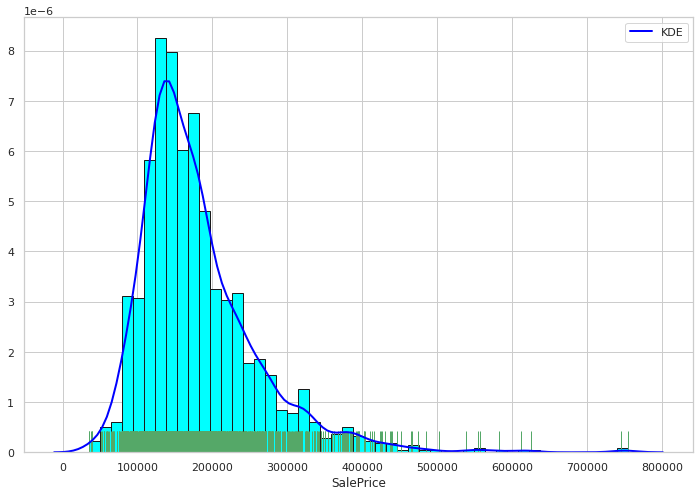

In [171]:
#Show SalePrice Distribution
dims = (12, 8)
fig, ax = plt.subplots(figsize=dims)
sns.set_color_codes()
sns.distplot(df_train['SalePrice'],
                  rug=True, rug_kws={"color": "g"},
                  kde_kws={"color": "blue", "lw": 2, "label": "KDE"},
                  hist_kws={ "linewidth": 1,"edgecolor": 'k', 
                            "alpha":1,"color": "cyan"})

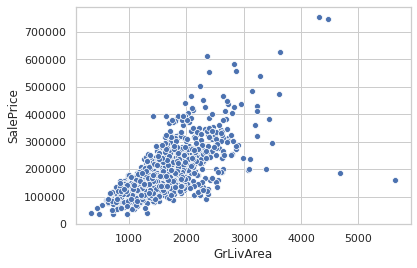

In [172]:
#ScatterPlot relation between GrLivArea vs. SalePrice

sns.scatterplot(x=df_train['GrLivArea'],y=df_train['SalePrice'])

In [173]:
!head -5 '/content/drive/My Drive/bls_unemployment_rate.csv'


Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1948,3.4,3.8,4.0,3.9,3.5,3.6,3.6,3.9,3.8,3.7,3.8,4.0
1949,4.3,4.7,5.0,5.3,6.1,6.2,6.7,6.8,6.6,7.9,6.4,6.6
1950,6.5,6.4,6.3,5.8,5.5,5.4,5.0,4.5,4.4,4.2,4.2,4.3


   Year  Jan  Feb  Mar  Apr  May  Jun  Jul  Aug  Sep  Oct  Nov  Dec
0  1948  3.4  3.8  4.0  3.9  3.5  3.6  3.6  3.9  3.8  3.7  3.8  4.0
1  1949  4.3  4.7  5.0  5.3  6.1  6.2  6.7  6.8  6.6  7.9  6.4  6.6
2  1950  6.5  6.4  6.3  5.8  5.5  5.4  5.0  4.5  4.4  4.2  4.2  4.3
3  1951  3.7  3.4  3.4  3.1  3.0  3.2  3.1  3.1  3.3  3.5  3.5  3.1
4  1952  3.2  3.1  2.9  2.9  3.0  3.0  3.2  3.4  3.1  3.0  2.8  2.7
   Year MonthName Rate
0  1948       Jan  3.4
1  1949       Jan  4.3
2  1950       Jan  6.5
3  1951       Jan  3.7
4  1952       Jan  3.2
   Rate       Date
0   3.4 1948-01-01
1   4.3 1949-01-01
2   6.5 1950-01-01
3   3.7 1951-01-01
4   3.2 1952-01-01


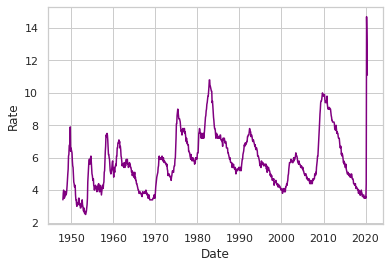

In [174]:
#Lineplot of unemployment over last 50 years with data from bls.gov

df_unemp=pd.read_csv('/content/drive/My Drive/bls_unemployment_rate.csv', header=0)

print(df_unemp.head(5))
df_unemp= pd.melt(df_unemp,id_vars=['Year'], value_vars=df_unemp.columns[1:])
df_unemp.columns=['Year','MonthName','Rate']

print(df_unemp.head(5))

datetime_col =df_unemp['MonthName'].apply(lambda x: datetime.datetime.strptime(x, "%b").month)
month_number = datetime_col
df_unemp['Month'] =month_number

df_unemp['DateStr'] = df_unemp.apply(lambda x: str(x['Year']) + "-" + str(x['Month']) + "-1", axis=1)
df_unemp['Date'] = pd.to_datetime(df_unemp['DateStr'])

df_unemp=df_unemp.drop(columns=['MonthName','DateStr','Month','Year'])

df_unemp['Rate'] = pd.to_numeric(df_unemp['Rate'],errors='coerce')
print(df_unemp.head(5))

sns.lineplot(data=df_unemp,x='Date',y='Rate',color='purple')

In [175]:
#BoxPlot
#ViolinPlot
#Strip Plot /Swarm Plot